In [1]:
import scipy.optimize as opt
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
def twoD_Gaussian_multicomp((x,y), amplitude1, xo1, yo1, sigma_x1, sigma_y1, theta1, offset1,
                           amplitude2, xo2, yo2, sigma_x2, sigma_y2, theta2, offset2):
    
    
    xo1 = float(xo1)
    yo1 = float(yo1)    
    a1 = (np.cos(theta1)**2)/(2*sigma_x1**2) + (np.sin(theta1)**2)/(2*sigma_y1**2)
    b1 = -(np.sin(2*theta1))/(4*sigma_x1**2) + (np.sin(2*theta1))/(4*sigma_y1**2)
    c1 = (np.sin(theta1)**2)/(2*sigma_x1**2) + (np.cos(theta1)**2)/(2*sigma_y1**2)
     
    g1 = offset1 + amplitude1*np.exp( - (a1*((x-xo1)**2) + 2*b1*(x-xo1)*(y-yo1) + c1*((y-yo1)**2)))
    
    
    xo2 = float(xo2)
    yo2 = float(yo2)    
    a2 = (np.cos(theta2)**2)/(2*sigma_x2**2) + (np.sin(theta2)**2)/(2*sigma_y2**2)
    b2 = -(np.sin(2*theta2))/(4*sigma_x2**2) + (np.sin(2*theta2))/(4*sigma_y2**2)
    c2 = (np.sin(theta2)**2)/(2*sigma_x2**2) + (np.cos(theta2)**2)/(2*sigma_y2**2)
     
    g2 = offset2 + amplitude2*np.exp( - (a2*((x-xo2)**2) + 2*b2*(x-xo2)*(y-yo2) + c2*((y-yo2)**2)))
    
    
    g = g1 + g2
    
    return g.ravel()

In [3]:
file = open("test_image_2.txt", "r")
test_image = pickle.load(file)
file.close()

(178, 20)


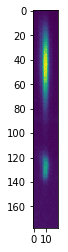

In [4]:
plt.imshow(test_image)
print test_image.shape

In [5]:
initial_guess = [800, 10, 45, 5, 25, 0, 0,
                500, 10, 120, 5, 10, 0, 0]
x = np.arange(0, 20)
y = np.arange(0, 178)
x,y = np.meshgrid(x, y)
popt, pcov = opt.curve_fit(twoD_Gaussian_multicomp, (x,y), test_image.flatten(), p0 = initial_guess)

/home/kyle/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  after removing the cwd from sys.path.


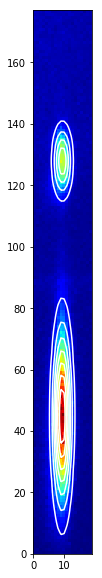

In [6]:
data_fitted = twoD_Gaussian_multicomp((x, y), *popt)

fig, ax = plt.subplots(1, 1, figsize=(8,10))
ax.hold(True)
ax.imshow(test_image.reshape(178, 20), cmap=plt.cm.jet, origin='bottom',
    extent=(x.min(), x.max(), y.min(), y.max()))
ax.contour(x, y, data_fitted.reshape(178, 20), 8, colors='w')
plt.show()

In [7]:
print (initial_guess-popt)/popt

[ 0.02677589  0.06397197  0.00522056  1.67447873  0.39726812 -1.
 -1.          0.06726011  0.05730851 -0.06160714  1.66831957  0.45628062
 -1.         -1.        ]


In [8]:
print popt

[ 7.79137889e+02  9.39874385e+00  4.47662950e+01  1.86952319e+00
  1.78920564e+01  8.06250780e-04 -1.96890544e+06  4.68489355e+02
  9.45797742e+00  1.27878211e+02  1.87383852e+00  6.86680841e+00
  2.92238301e-04  1.96892985e+06]
